In [162]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [163]:
data = pd.read_csv("data/full_restaurant_rating_data.csv")

In [164]:
data.columns
data = data[['url', 'list_of_meals', 'list_of_cuisines',
       'list_of_features', 'list_of_special_diets']]

## Cleaning lists

In [165]:
def clean_list(list_):
    list_ = list_.replace(', ', '","')
    if list_ != '[]':
        list_ = '["' + list_ + '"]'
    return list_

In [166]:
data["list_of_meals"] = data["list_of_meals"].apply(clean_list).apply(eval)
data["list_of_cuisines"] = data["list_of_cuisines"].apply(clean_list).apply(eval)
data["list_of_features"] = data["list_of_features"].apply(clean_list).apply(eval)
data["list_of_special_diets"] = data["list_of_special_diets"].apply(clean_list).apply(eval)

In [167]:
meals_dict = {}
for i in data["list_of_meals"]:
    for j in i:
        if j not in meals_dict:
            meals_dict[j] = 1
        else:
            meals_dict[j] += 1

cuisines_dict = {}
for i in data["list_of_cuisines"]:
    for j in i:
        if j not in cuisines_dict:
            cuisines_dict[j] = 1
        else:
            cuisines_dict[j] += 1

features_dict = {}
for i in data["list_of_features"]:
    for j in i:
        if j not in features_dict:
            features_dict[j] = 1
        else:
            features_dict[j] += 1

diets_dict = {}
for i in data["list_of_special_diets"]:
    for j in i:
        if j not in diets_dict:
            diets_dict[j] = 1
        else:
            diets_dict[j] += 1

## Preproccessing Meals

In [168]:
def ohc(key,list):
    if key in list:
        return 1
    return 0

In [169]:
def exists(list):
    if bool(list):
        return 1
    return 0

In [170]:
for key in meals_dict:
    data[key] = data["list_of_meals"].apply(lambda x: ohc(key,x))
data['has_meals'] = data["list_of_meals"].apply(exists)

In [171]:
data.head()

,url,list_of_meals,list_of_cuisines,list_of_features,list_of_special_diets,Lunch,Dinner,Drinks,Breakfast,Brunch,After-hours,has_meals
0,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Lunch, Dinner, Drinks]","[Pizza, Italian]","[Delivery, Takeout, Reservations, Outdoor Seat...",[],1,1,1,0,0,0,1
1,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Lunch, Dinner, Drinks]","[French, European, Healthy]","[Takeout, Reservations, Outdoor Seating, Seati...","[Vegetarian Friendly, Vegan Options, Gluten Fr...",1,1,1,0,0,0,1
2,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Drinks, Breakfast, Lunch, Brunch, Dinner, Aft...","[Japanese, Indian, International]","[Valet Parking, Full Bar, Reservations, Buffet...","[Vegetarian Friendly, Gluten Free Options, Veg...",1,1,1,1,1,1,1
3,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Breakfast, Lunch, Dinner, Brunch, After-hours...","[Bar, Cafe, International, Singaporean, Wine Bar]","[Reservations, Seating, Serves Alcohol, Full B...",[Vegan Options],1,1,1,1,1,1,1
4,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Lunch, Dinner, Brunch]","[Chinese, Asian]","[Delivery, Reservations, Private Dining, Seati...","[Vegetarian Friendly, Vegan Options, Gluten Fr...",1,1,0,0,1,0,1


## Preprocessing Cuisines

In [172]:
establishment_types = {'Bar': 620,
 'Cafe': 812,
  'Wine Bar': 132,
   'Brew Pub': 26,
    'Steakhouse': 140,
 'Grill': 165,
  'Pub': 442,
   'Dining bars': 49,
    'Diner': 55,
     'Gastropub': 53,
      'Fast food': 279,
 'Deli': 49,
  'Beer restaurants': 31,
   'Fruit parlours': 7,
}.keys()
establishment_types = list(establishment_types)

In [173]:
def find(to_find, list):
    try:
        return list.index(to_find), to_find
    except ValueError:
        return 10000, None


In [174]:
establishment = []
for index, row in data.iterrows():
    estab = (min(find(establishment_type,row["list_of_cuisines"]) for establishment_type in establishment_types))
    establishment.append(estab[1])
data["establishment_type"] = establishment

In [175]:
data.head()

,url,list_of_meals,list_of_cuisines,list_of_features,list_of_special_diets,Lunch,Dinner,Drinks,Breakfast,Brunch,After-hours,has_meals,establishment_type
0,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Lunch, Dinner, Drinks]","[Pizza, Italian]","[Delivery, Takeout, Reservations, Outdoor Seat...",[],1,1,1,0,0,0,1,None
1,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Lunch, Dinner, Drinks]","[French, European, Healthy]","[Takeout, Reservations, Outdoor Seating, Seati...","[Vegetarian Friendly, Vegan Options, Gluten Fr...",1,1,1,0,0,0,1,None
2,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Drinks, Breakfast, Lunch, Brunch, Dinner, Aft...","[Japanese, Indian, International]","[Valet Parking, Full Bar, Reservations, Buffet...","[Vegetarian Friendly, Gluten Free Options, Veg...",1,1,1,1,1,1,1,None
3,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Breakfast, Lunch, Dinner, Brunch, After-hours...","[Bar, Cafe, International, Singaporean, Wine Bar]","[Reservations, Seating, Serves Alcohol, Full B...",[Vegan Options],1,1,1,1,1,1,1,Bar
4,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Lunch, Dinner, Brunch]","[Chinese, Asian]","[Delivery, Reservations, Private Dining, Seati...","[Vegetarian Friendly, Vegan Options, Gluten Fr...",1,1,0,0,1,0,1,None


In [176]:
cuisines = {'Pizza': 263,
 'Italian': 453,
 'French': 192,
 'European': 501,
 #'Healthy': 218,
 'Japanese': 1070,
 'Indian': 480,
 'International': 355,
 'Singaporean': 1405,
 'Chinese': 1798,
 'Asian': 3837,
 'Mediterranean': 157,
 'Turkish': 36,
 'Middle Eastern': 82,
 'German': 23,
 'Central European': 16,
 'Sicilian': 2,
 'Southern-Italian': 9,
 'Northern-Italian': 3,
 'Central-Italian': 9,
 #'Seafood': 591,
 'Lebanese': 29,
 #'Barbecue': 197,
 'Arabic': 16,
 'Sushi': 330,
 'Japanese Fusion': 42,
 #'Fusion': 373,
 'Caucasian': 15,
 'Contemporary': 129,
 'American': 441,
 #'Street Food': 71,
 'Thai': 383,
 #'Soups': 170,
 'Neapolitan': 5,
 'Campania': 5,
 'Southwestern': 57,
 'Egyptian': 4,
 'Irish': 10,
 'Spanish': 71,
 'Greek': 18,
 'British': 47,
 'Russian': 4,
 'Eastern European': 6,
 'Ukrainian': 1,
 'Tuscan': 4,
 'New Zealand': 5,
 'Vietnamese': 112,
 'Indonesian': 125,
 'Taiwanese': 83,
 'Korean': 254,
 'Kaiseki': 7,
 'Persian': 7,
 'Swiss': 13,
 'Australian': 56,
 'Mexican': 61,
 'Cajun & Creole': 6,
 'Peruvian': 3,
 'South American': 18,
 'Brazilian': 7,
 'Pakistani': 13,
 'Malaysian': 226,
 'Latin': 17,
 'Dutch': 2,
 'Caribbean': 5,
 'Jamaican': 1,
 'Central Asian': 23,
 'Yunnan': 4,
 'Central American': 14,
     'Medicinal foods': 2,
 'Nepalese': 7,
 'Argentinian': 2,
 'Austrian': 3,
 'Sri Lankan': 3,
 'Israeli': 5,
 'Scandinavian': 6,
 'Swedish': 8,
 'Portuguese': 10,
 'Catalan': 1,
 'Scottish': 2,
 'Tibetan': 1,
 'Hawaiian': 10,
 'Hokkaido cuisine': 5,
 'Belgian': 3,
 'Czech': 1,
 'Afghani': 4,
 'Burmese': 2,
 'African': 3,
 'Japanese sweets parlour': 6,
 'Cuban': 4,
 'Philippine': 12,
 'Chilean': 1,
 'Moroccan': 3,
 'Bangladeshi': 2,
 'Albanian': 1,
 'Mongolian': 2,
 'Fujian': 4,
 'Kappo': 3,
 'Beijing cuisine': 3,
 'Danish': 1,
 'Canadian': 2,
 'Azerbaijani': 1,
 'Kyoto cuisine': 1,
 'Armenian': 1,
 'Norwegian': 1,
 'Native American': 1,
 'Xinjiang': 2}
cuisines = list(cuisines.keys())

In [177]:
cuisine = []
for index, row in data.iterrows():
    cui = (min(find(cuisine,row["list_of_cuisines"]) for cuisine in cuisines))
    cuisine.append(cui[1])
data["cuisine"] = cuisine

In [178]:
replace = {
'Asian': 'asian',
  'Korean': 'asian',
   'Taiwanese': 'asian',
    'Central Asian': 'asian',
     'Pakistani': 'asian',
 'Nepalese': 'asian',
 'Tibetan': 'asian',
 'Japanese': "japanese",
  'Sushi': "japanese",
   'Japanese Fusion': "japanese",
 'Italian': "italian",
 'Pizza': "italian",
  'Central-Italian': "italian",
 'American': "north_american",
 'Cajun & Creole': "north_american",
  'Canadian': "north_american",
   'Southwestern':"north_american",
   'Hawaiian': "north_american",
    'Contemporary':"north_american",
    "Caucasian":"european",
 'European': "european",
  'Eastern European': "european",
 'Dutch': "european",
 'Belgian': "european",
  'German': "european",
   'British': "european",
    'Portuguese':"european",
     'Irish':"european",
       'Swiss': "european",
       'Greek': "european",
        'Swedish': "european",
         'Austrian': "european",
 'Russian': "european",
  'Czech': "european",
   'Scottish': "european",
 'Scandinavian': "european",
 'Central European': "european",
  'Spanish': "european",
   'French': "european",
  'Singaporean': "sea",
  'Philippine': "sea",
 'Malaysian': "sea",
   'Indonesian': "sea",
    'Vietnamese': "sea",
     'Thai': "sea",
    'Mediterranean': "arabic",
  'Arabic': "arabic",
 'Middle Eastern': "arabic",
 'Persian': "arabic",
 'Lebanese': "arabic",
  'Israeli': "arabic",
   'Moroccan': "arabic",
    'Turkish': "arabic",
    'Egyptian': "arabic",
 'South American': "south_american",
 'Brazilian': "south_american",
  'Argentinian': "south_american",
   'Caribbean': "south_american",
   'Latin': "south_american",
 'Peruvian': "south_american",
  'Mexican': "south_american",
  'New Zealand': "others",
 'African': "others",
  'Australian': "others",
  "Chinese":"chinese",
  "indian":"indian",
  "international":"international"}
 





data.cuisine.replace(replace,inplace=True)



 
 

In [179]:
data.cuisine.value_counts()

asian             1812
chinese           1587
japanese          1058
italian            515
european           458
north_american     453
Indian             429
sea                347
International      222
arabic             133
south_american      74
others              30
Name: cuisine, dtype: int64

## Preprocessing Features

In [180]:
features_dict = {
 'Delivery': 684,
 'Reservations': 3627,
 'Outdoor Seating': 850,
 'Seating': 3814,
 'Highchairs Available': 894,
 'Digital Payments': 399,
 'Free Wifi': 713,
 'Cash Only': 193,
 'Wheelchair Accessible': 1626,
 'Table Service': 3088,
  'Live Music': 122,

# PARKING AVAIL
 'Valet Parking': 88,
 'Free off-street parking': 73,
 'Street Parking': 324,
 'Parking Available': 793,
 'Validated Parking': 174,
#####

# Alcohol Available
 'Full Bar': 640,
 'Serves Alcohol': 1929,
 'Wine and Beer': 652,
####

# Credit cards
 'Accepts Credit Cards': 1083,
 'Accepts American Express': 354,
 'Accepts Mastercard': 487,
 'Accepts Visa': 489,
####


# 'Non-smoking restaurants': 160,
# 'Private Dining': 260,
# 'Drive Thru': 9,
# 'Family style': 168,
# 'Gift Cards Available': 676,
# 'Television': 186,
# 'Takeout': 2241,
# 'Dog Friendly': 36,
# 'BYOB': 35,

# 'Buffet': 145,
# 'Waterfront': 20,
# 'Jazz Bar': 13,
# 'Playgrounds': 20,
# 'Accepts Discover': 17,
# 'Sports bars': 16,
# 'Beach': 1
 }

In [181]:
for key in features_dict:
    data[key] = data["list_of_features"].apply(lambda x: ohc(key,x))
data['has_features'] = data["list_of_features"].apply(exists) 

In [182]:
data.head()

,url,list_of_meals,list_of_cuisines,list_of_features,list_of_special_diets,Lunch,Dinner,Drinks,Breakfast,Brunch,...,Parking Available,Validated Parking,Full Bar,Serves Alcohol,Wine and Beer,Accepts Credit Cards,Accepts American Express,Accepts Mastercard,Accepts Visa,has_features
0,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Lunch, Dinner, Drinks]","[Pizza, Italian]","[Delivery, Takeout, Reservations, Outdoor Seat...",[],1,1,1,0,0,...,0,0,0,1,1,1,0,0,0,1
1,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Lunch, Dinner, Drinks]","[French, European, Healthy]","[Takeout, Reservations, Outdoor Seating, Seati...","[Vegetarian Friendly, Vegan Options, Gluten Fr...",1,1,1,0,0,...,0,0,0,1,1,0,0,0,0,1
2,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Drinks, Breakfast, Lunch, Brunch, Dinner, Aft...","[Japanese, Indian, International]","[Valet Parking, Full Bar, Reservations, Buffet...","[Vegetarian Friendly, Gluten Free Options, Veg...",1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Breakfast, Lunch, Dinner, Brunch, After-hours...","[Bar, Cafe, International, Singaporean, Wine Bar]","[Reservations, Seating, Serves Alcohol, Full B...",[Vegan Options],1,1,1,1,1,...,0,0,1,1,1,1,0,0,0,1
4,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Lunch, Dinner, Brunch]","[Chinese, Asian]","[Delivery, Reservations, Private Dining, Seati...","[Vegetarian Friendly, Vegan Options, Gluten Fr...",1,1,0,0,1,...,1,1,1,1,0,1,0,0,0,1


In [183]:
parking_avail = {
 'Valet Parking': 88,
 'Free off-street parking': 73,
 'Street Parking': 324,
 'Parking Available': 793,
 'Validated Parking': 174,}
#####

alcohol_avail = {
 'Full Bar': 640,
 'Serves Alcohol': 1929,
 'Wine and Beer': 652,}
####

credit_cards = {
 'Accepts Credit Cards': 1083,
 'Accepts American Express': 354,
 'Accepts Mastercard': 487,
 'Accepts Visa': 489,}

In [184]:
arr = []
for index, row in data.iterrows():
    counter = 0
    for key in parking_avail:
        if row[key] == 1:
            counter += 1
    arr.append(int(bool(counter)))
data["parking_avail"] = arr
data.drop(list(parking_avail.keys()),axis=1, inplace=True)

In [185]:
arr = []
for index, row in data.iterrows():
    counter = 0
    for key in alcohol_avail:
        if row[key] == 1:
            counter += 1
    arr.append(int(bool(counter)))
data["alcohol_avail"] = arr
data.drop(list(alcohol_avail.keys()),axis=1, inplace=True)

In [186]:
arr = []
for index, row in data.iterrows():
    counter = 0
    for key in credit_cards:
        if row[key] == 1:
            counter += 1
    arr.append(int(bool(counter)))
data["creditcard_avail"] = arr
data.drop(list(credit_cards.keys()),axis=1, inplace=True)

In [187]:
data.creditcard_avail

0        1
1        0
2        1
3        1
4        1
        ..
11156    0
11157    0
11158    0
11159    0
11160    0
Name: creditcard_avail, Length: 11161, dtype: int64

In [188]:
data.head()

,url,list_of_meals,list_of_cuisines,list_of_features,list_of_special_diets,Lunch,Dinner,Drinks,Breakfast,Brunch,...,Digital Payments,Free Wifi,Cash Only,Wheelchair Accessible,Table Service,Live Music,has_features,parking_avail,alcohol_avail,creditcard_avail
0,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Lunch, Dinner, Drinks]","[Pizza, Italian]","[Delivery, Takeout, Reservations, Outdoor Seat...",[],1,1,1,0,0,...,1,1,0,0,0,0,1,0,1,1
1,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Lunch, Dinner, Drinks]","[French, European, Healthy]","[Takeout, Reservations, Outdoor Seating, Seati...","[Vegetarian Friendly, Vegan Options, Gluten Fr...",1,1,1,0,0,...,1,0,0,1,1,0,1,0,1,0
2,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Drinks, Breakfast, Lunch, Brunch, Dinner, Aft...","[Japanese, Indian, International]","[Valet Parking, Full Bar, Reservations, Buffet...","[Vegetarian Friendly, Gluten Free Options, Veg...",1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
3,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Breakfast, Lunch, Dinner, Brunch, After-hours...","[Bar, Cafe, International, Singaporean, Wine Bar]","[Reservations, Seating, Serves Alcohol, Full B...",[Vegan Options],1,1,1,1,1,...,0,0,0,0,1,0,1,0,1,1
4,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Lunch, Dinner, Brunch]","[Chinese, Asian]","[Delivery, Reservations, Private Dining, Seati...","[Vegetarian Friendly, Vegan Options, Gluten Fr...",1,1,0,0,1,...,0,0,0,1,1,1,1,1,1,1


## Preprocessing Diets

In [189]:
diets_dict = {'Vegetarian Friendly': 1220,
 'Vegan Options': 671,
 'Gluten Free Options': 342,
 'Halal': 249,
 #'Kosher': 1
 }


In [190]:
for key in diets_dict:
    data[key] = data["list_of_special_diets"].apply(lambda x: ohc(key,x))
#data['has_features'] = data["list_of_features"].apply(exists) 

In [191]:
data.head()

,url,list_of_meals,list_of_cuisines,list_of_features,list_of_special_diets,Lunch,Dinner,Drinks,Breakfast,Brunch,...,Table Service,Live Music,has_features,parking_avail,alcohol_avail,creditcard_avail,Vegetarian Friendly,Vegan Options,Gluten Free Options,Halal
0,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Lunch, Dinner, Drinks]","[Pizza, Italian]","[Delivery, Takeout, Reservations, Outdoor Seat...",[],1,1,1,0,0,...,0,0,1,0,1,1,0,0,0,0
1,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Lunch, Dinner, Drinks]","[French, European, Healthy]","[Takeout, Reservations, Outdoor Seating, Seati...","[Vegetarian Friendly, Vegan Options, Gluten Fr...",1,1,1,0,0,...,1,0,1,0,1,0,1,1,1,0
2,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Drinks, Breakfast, Lunch, Brunch, Dinner, Aft...","[Japanese, Indian, International]","[Valet Parking, Full Bar, Reservations, Buffet...","[Vegetarian Friendly, Gluten Free Options, Veg...",1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Breakfast, Lunch, Dinner, Brunch, After-hours...","[Bar, Cafe, International, Singaporean, Wine Bar]","[Reservations, Seating, Serves Alcohol, Full B...",[Vegan Options],1,1,1,1,1,...,1,0,1,0,1,1,0,1,0,0
4,https://www.tripadvisor.com.sg/Restaurant_Revi...,"[Lunch, Dinner, Brunch]","[Chinese, Asian]","[Delivery, Reservations, Private Dining, Seati...","[Vegetarian Friendly, Vegan Options, Gluten Fr...",1,1,0,0,1,...,1,1,1,1,1,1,1,1,1,0


In [192]:
data.columns

Index(['url', 'list_of_meals', 'list_of_cuisines', 'list_of_features',
       'list_of_special_diets', 'Lunch', 'Dinner', 'Drinks', 'Breakfast',
       'Brunch', 'After-hours', 'has_meals', 'establishment_type', 'cuisine',
       'Delivery', 'Reservations', 'Outdoor Seating', 'Seating',
       'Highchairs Available', 'Digital Payments', 'Free Wifi', 'Cash Only',
       'Wheelchair Accessible', 'Table Service', 'Live Music', 'has_features',
       'parking_avail', 'alcohol_avail', 'creditcard_avail',
       'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options', 'Halal'],
      dtype='object')

In [193]:
import matplotlib.pyplot as plt


## Meals Visualization

([<matplotlib.patches.Wedge at 0x1d4a1eb9208>,
 [Text(-0.13481262751579817, 1.0917076327764164, 'Lunch not available'),
  Text(0.13481262751579778, -1.0917076327764166, 'Lunch available')])

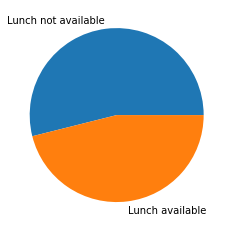

In [194]:
plt.pie(data.Lunch.value_counts(),labels=["Lunch not available","Lunch available"])


([<matplotlib.patches.Wedge at 0x1d4a1efbec8>,
 [Text(-0.0472036837448864, 1.098986720684519, 'Dinner not available'),
  Text(0.04720368374488675, -1.098986720684519, 'Dinner available')])

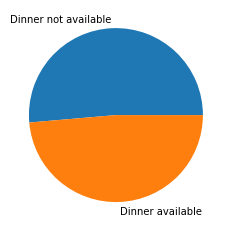

In [195]:
plt.pie(data.Dinner.value_counts(),labels=["Dinner not available","Dinner available"])

([<matplotlib.patches.Wedge at 0x1d4a1f40588>,
 [Text(-1.0577361122754008, 0.30198396776736525, 'Drinks not available'),
  Text(1.0577360910700633, -0.30198404204166635, 'Drinks available')])

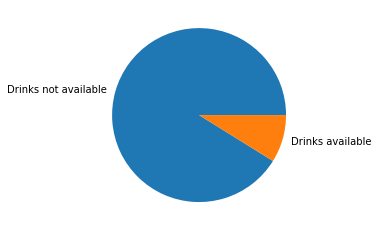

In [196]:
plt.pie(data.Drinks.value_counts(),labels=["Drinks not available","Drinks available"])

([<matplotlib.patches.Wedge at 0x1d4b9aba748>,
 [Text(-1.0474084425447465, 0.33605885568749494, 'Breakfast not available'),
  Text(1.0474084189466684, -0.3360589292365858, 'Breakfast available')])

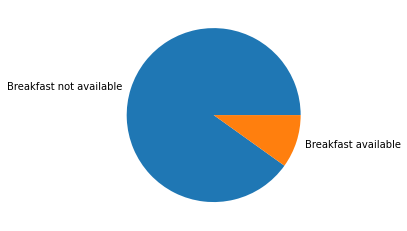

In [197]:
plt.pie(data.Breakfast.value_counts(),labels=["Breakfast not available","Breakfast available"])

([<matplotlib.patches.Wedge at 0x1d4b9b0f548>,
 [Text(-1.0491907470351656, 0.3304523813438049, 'Brunch not available'),
  Text(1.049190739300369, -0.33045240590188696, 'Brunch available')])

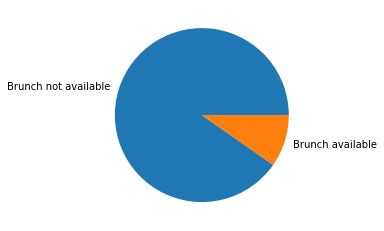

In [198]:
plt.pie(data.Brunch.value_counts(),labels=["Brunch not available","Brunch available"])

([<matplotlib.patches.Wedge at 0x1d4b9b653c8>,
 [Text(-1.0830216366572296, 0.1925204782154245, 'After-hours not available'),
  Text(1.083021638910363, -0.1925204655404493, 'After-hours available')])

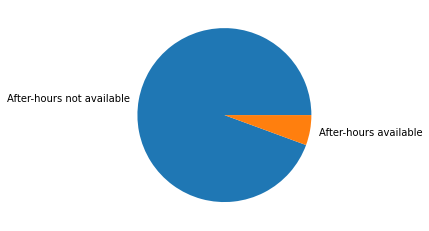

In [199]:
plt.pie(data["After-hours"].value_counts(),labels=["After-hours not available","After-hours available"])

## Establishment Type

<AxesSubplot:>

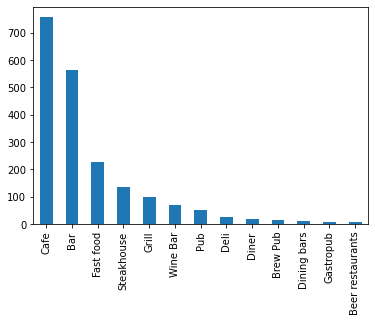

In [200]:
data.establishment_type.value_counts().plot(kind="bar")

## Cuisines

<AxesSubplot:>

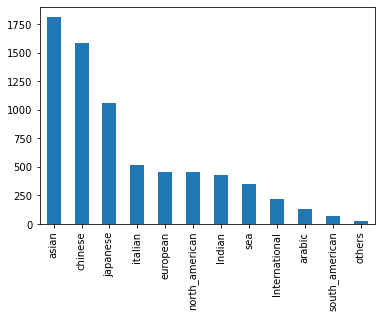

In [201]:
data.cuisine.value_counts().plot(kind="bar")

## Features

<AxesSubplot:ylabel='Delivery'>

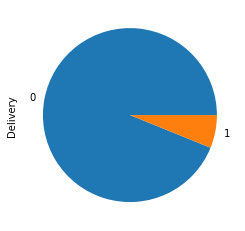

In [202]:
data.Delivery.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Reservations'>

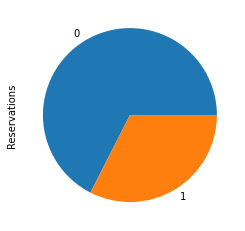

In [203]:
data.Reservations.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Outdoor Seating'>

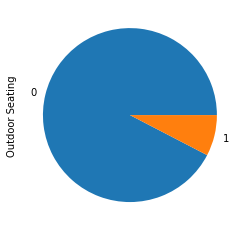

In [204]:
data['Outdoor Seating'].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Seating'>

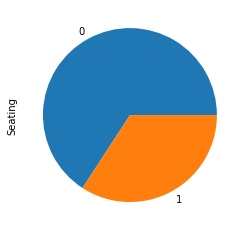

In [205]:
data.Seating.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Highchairs Available'>

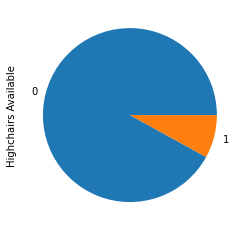

In [206]:
data['Highchairs Available'].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Digital Payments'>

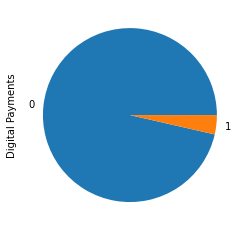

In [207]:
data['Digital Payments'].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Free Wifi'>

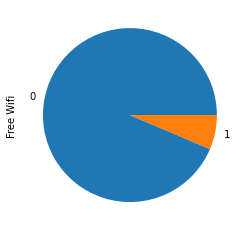

In [208]:
data['Free Wifi'].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Cash Only'>

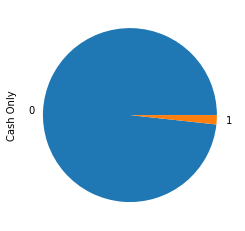

In [209]:
data['Cash Only'].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Wheelchair Accessible'>

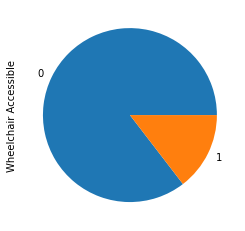

In [210]:
data['Wheelchair Accessible'].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Table Service'>

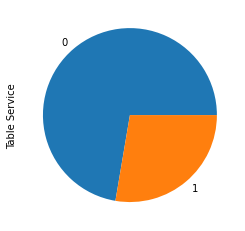

In [211]:
data['Table Service'].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Live Music'>

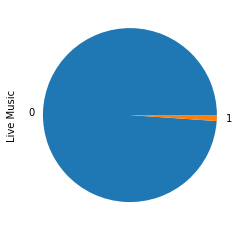

In [212]:
data['Live Music'].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='has_features'>

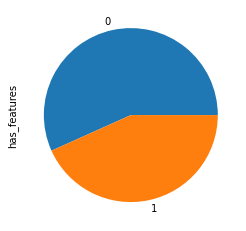

In [213]:
data['has_features'].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='parking_avail'>

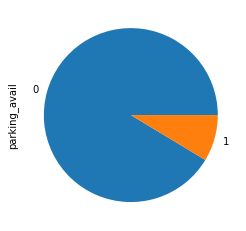

In [214]:
data.parking_avail.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='alcohol_avail'>

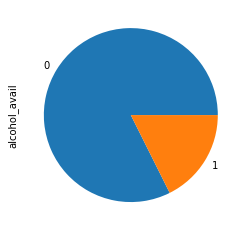

In [215]:
data.alcohol_avail.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='creditcard_avail'>

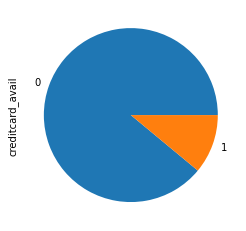

In [216]:
data.creditcard_avail.value_counts().plot(kind="pie")

In [217]:
data.columns

Index(['url', 'list_of_meals', 'list_of_cuisines', 'list_of_features',
       'list_of_special_diets', 'Lunch', 'Dinner', 'Drinks', 'Breakfast',
       'Brunch', 'After-hours', 'has_meals', 'establishment_type', 'cuisine',
       'Delivery', 'Reservations', 'Outdoor Seating', 'Seating',
       'Highchairs Available', 'Digital Payments', 'Free Wifi', 'Cash Only',
       'Wheelchair Accessible', 'Table Service', 'Live Music', 'has_features',
       'parking_avail', 'alcohol_avail', 'creditcard_avail',
       'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options', 'Halal'],
      dtype='object')

## Diets

<AxesSubplot:ylabel='Vegetarian Friendly'>

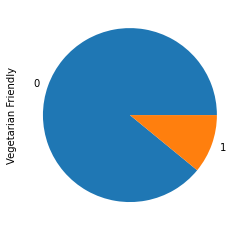

In [218]:
data['Vegetarian Friendly'].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Vegan Options'>

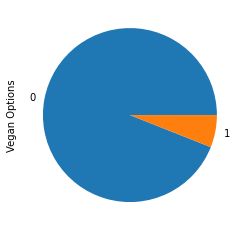

In [219]:
data[ 'Vegan Options'].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Gluten Free Options'>

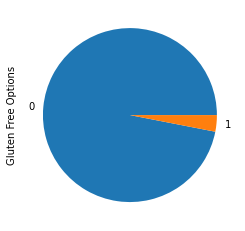

In [220]:
data['Gluten Free Options'].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Halal'>

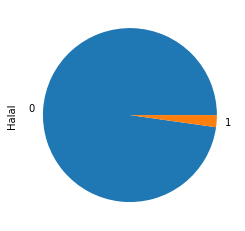

In [221]:
data.Halal.value_counts().plot(kind="pie")